In [5]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from linetools.spectra import utils as ltsu
from linetools.spectra.xspectrum1d import XSpectrum1D
import astropy.units as u
from array import array
import os

In [10]:
spec_atr = Table.read('/home/sebastian/Spectra/Spec Attributes.txt', format = 'ascii')  #to read in the Zem data


In [7]:
spec_list = spec_atr['Filename']   #to match the Zem values with their correct spec

basestring = '/home/sebastian/Spectra/spec/'

xspec_list = [XSpectrum1D.from_file(basestring + filename) for filename in spec_list]


In [8]:
xcollate = ltsu.collate(xspec_list)  #to create a single xspec list


In [9]:
xreb = ltsu.rebin_to_rest(xcollate, spec_atr["zspec"],200*u.km/u.s,grow_bad_sig=True)

xreb.wavelength

<Quantity [  769.8026194 ,  770.31617643,  770.83007607,...,
            5646.82405736, 5650.59121288, 5654.36088157] Angstrom>

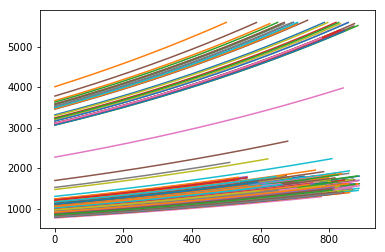

In [49]:
for spectra in xreb:
    plt.plot(spectra.wavelength)
plt.show()

#this is where things dont work out!

In [46]:
s2n_list = [XSpectrum1D.get_local_s2n(i,1216*u.AA) for i in xreb] #attemting to rebin but wavelenght is out of range

s2n_list


#xspec = ltsu.collate(xspec_list)

#for i in (xspec):
    
#    xspec[0].plot()
    
#xspec.nspec

OSError: `wv0` is outside spectral range.